### Questions

### Objectives
YWBAT
* change functions from 'def' format to 'lambda' format
* define the word `api`
* Pandas basics and how to read method chaining
* Plot important aspects of a pandas dataframe using the pandas api
* Create a pivot table in pandas (this will be done on learn.co)

### Activator

Send me the following, in a private zoom chat, please indicate if you're doing level 1 or level 2

Convert this function to a lambda function

**Level 1**

```
def f1(x, y, z):
    s = x + y
    return z*s
```

**Level 2**

```
def f1(x, y, z):
    s = x + y
    z = 0.01 if z == 0 else z
    return z*s
```

<details>
<summary>Solution</summary>
    
**Level 1**

```
f1 = lambda x, y, z: z*(x + y)
```

**Level 2**
```
f1 = lambda x, y, z: z*(x + y) if z !=0 else 0.01*(x + y)
```
</details>

In [2]:
z = 12

z = 0.01 if z == 0 else z

z

12

In [7]:
# Activator notes
f1 = lambda x, y, z: z*(x + y)

f2 = lambda x, y, z: 0.01*(x + y) if z == 0 else z*(x + y)

f3 = lambda x, y, z: (x + y) * (0.01 if z == 0 else z)

In [6]:
f2(2, 3, 0.5), f3(2, 3, 0.5)

(2.5, 2.5)

In [8]:
import numpy as np
import pandas as pd

from collections import defaultdict
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns

### What is PANDAS?
- it is a python library dedicated towards tools to helping analyze dataframes
    - built on top of numpy

In [15]:
# how to create a dataframe from dictionaries
student1 = {"name": "Melvin", "cereal": "Honey Nut Cheerios"}
student2 = {"name": "Doug", "cereal": "Lucky Charms"}
student3 = {"name": "Andi", "cereal": "Lucky Charms"}
student4 = {"name": "Ice", "cereal": "Captain Crunch"}
student5 = {"name": "Devin", "cereal": "Coco Puffs"}
student6 = {"name": "John L.", "cereal": "Frosted Flakes"}
student7 = {"name": "Terry", "cereal": "Corn Flakes"}

dlist = [student1, student2, student3, student4, student5, student6, student7]

student_df = pd.DataFrame(dlist)
student_df.head()

,name,cereal
0,Melvin,Honey Nut Cheerios
1,Doug,Lucky Charms
2,Andi,Lucky Charms
3,Ice,Captain Crunch
4,Devin,Coco Puffs


In [9]:
boston = load_boston()

In [10]:
data = boston["data"] # call using dictionary notation
target = boston.target # or use .key_name
columns = list(boston.feature_names)

In [11]:
# . calls methods and attributes of the object type
data.shape, target.shape

((506, 13), (506,))

In [16]:
df = pd.DataFrame(data, columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
# how do i create a column called target with those nice y values?
df["target"] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
# select a group of columns
# CRIM, RM, TAX, target df.loc[rows, columns]
display(df.loc[:, ['CRIM', 'RM', 'TAX', 'target']].head())

display(df[['CRIM', 'RM', 'TAX', 'target']].head())

,CRIM,RM,TAX,target
0,0.00632,6.575,296.0,24.0
1,0.02731,6.421,242.0,21.6
2,0.02729,7.185,242.0,34.7
3,0.03237,6.998,222.0,33.4
4,0.06905,7.147,222.0,36.2


,CRIM,RM,TAX,target
0,0.00632,6.575,296.0,24.0
1,0.02731,6.421,242.0,21.6
2,0.02729,7.185,242.0,34.7
3,0.03237,6.998,222.0,33.4
4,0.06905,7.147,222.0,36.2


In [26]:
df['target'] < 30

0       True
1       True
2      False
3      False
4      False
       ...  
501     True
502     True
503     True
504     True
505     True
Name: target, Length: 506, dtype: bool

In [30]:
# pandas slicing
# get dataf,rame with rows where target < 30
display(df[df['target'] < 30].head(10))


display(df.loc[df['target'] < 30].head(10))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7


In [34]:
# pandas slicing on multiple conditions
# target < 30 and age > 80
df.loc[(df['target'] < 30) & (df['AGE'] > 80)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [41]:
# pandas slicing on mult. conditions for specific columns
# target > 30 and age > 75 but only grab the target and age columns
display(df.loc[(df['target'] < 30) & (df['AGE'] > 75), ['AGE', 'target']].head())

display(df.loc[(df['target'] < 30) & (df['AGE'] > 75)][['AGE', 'target']].head())

,AGE,target
1,78.9,21.6
7,96.1,27.1
8,100.0,16.5
9,85.9,18.9
10,94.3,15.0


,AGE,target
1,78.9,21.6
7,96.1,27.1
8,100.0,16.5
9,85.9,18.9
10,94.3,15.0


In [48]:
# pandas slicing on mult. conditions for specific columns
# target > 30 and age > 75 but only grab the CRIM
display(df.loc[(df['target'] < 30) & (df['AGE'] > 75), ['CRIM']].head())


display(df.loc[(df['target'] < 30) & (df['AGE'] > 75)][['CRIM']].head())

,CRIM
1,0.02731
7,0.14455
8,0.21124
9,0.17004
10,0.22489


,CRIM
1,0.02731
7,0.14455
8,0.21124
9,0.17004
10,0.22489


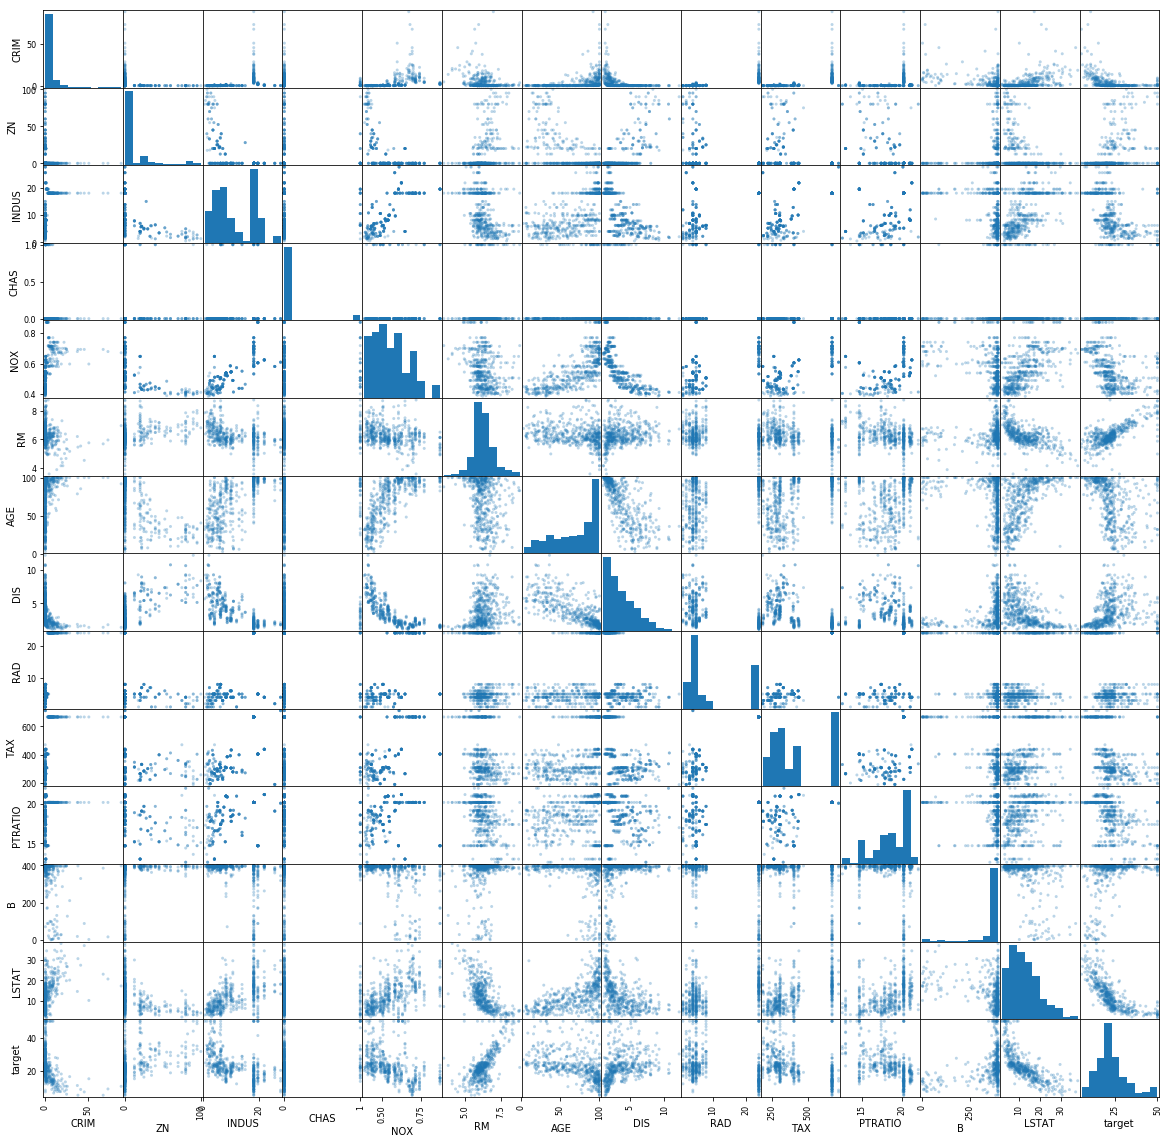

In [56]:
# Plot a scattermatrix of your dataframe
pd.plotting.scatter_matrix(df, figsize=(20, 20), diagonal='hist', marker='.', alpha=0.3)
plt.show()

In [89]:
# Make a function that plots a specific column of the dataframe as a histogram
# Make the color of it purple by default, alpha value should be 0.8 by default
# Make a parameter to toggle a grid
# Make parameters for axis labels and the title of the histogram
# Make a parameter for number of bins and default it to 20
# call the function `plot_histogram`

def plot_column(column_name, bins=20, color='purple', alpha=0.5, grid_linestyle='dashed'):
    plt.figure(figsize=(8, 5))
    plt.hist(df[column_name], bins=bins, color=color, alpha=alpha, zorder=2)
    plt.grid(zorder=0, linestyle=grid_linestyle, linewidth=1.3)
    plt.title(f"{column_name} Distribution")
    plt.xlabel(f"{column_name} values")
    plt.ylabel("Frequency")
    plt.show()

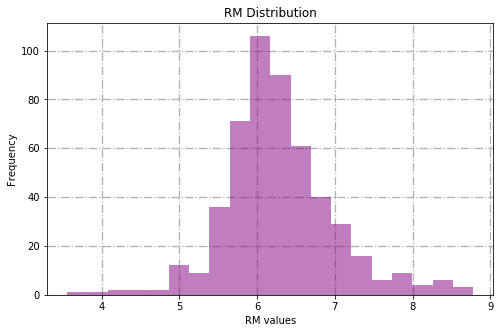

In [90]:
plot_column('RM', grid_linestyle='-.')

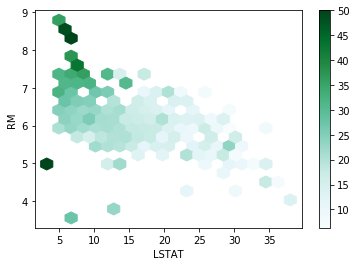

In [102]:
# Plot a hexbin plot of AGE vs RM colored by target values
# plots 2 features (x, y axis) and colors by your target

sliced_df = df.loc[(df['LSTAT'] >= 5) | (df['RM']<=6)]
sliced_df.plot.hexbin(x='LSTAT', y='RM', C='target', gridsize=20)
plt.show()

In [105]:
df.RM.mean() + 3*df.RM.std(), df.RM.mean() - 3*df.RM.std()

(8.392485817597748, 4.176782957105809)

### Assessment
* what is the different between a list object and a numpy.array object?
* what is the benefit of using numpy vs writing your own methods?
* what is the index of a dataframe? What is a rule for the index? What are columns? 
* how do we find the mean of a specific column in a dataframe?
* plot a hist, scatterplot, lineplot, hexmap, heatmap